# Weekly activity
1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use _"lena.jfif"_ as the input image.
    - Use external libraries `imutils`.  
    - Modify the transformation matrix.
2. Use the images with titles: _"flower.jfif"_ and _"native-bee.png"_. I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are `cv.bitwise_and()`, `cv.bitwise_or()` and `cv.bitwise_not()`. You need to use `cv.threshold` function to segment the flower. Please refer to [online documentation](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html) for more info. The result should resemble the following:  
![bee and flowers](img_embed/activity3.PNG "bee_flower")
3. Write a function that randomly crop the central region of an image. The method signature should be as shown in the following:
```
random_center_crop(image, min_crop_ratio, max_crop_ratio)
```

4. Aside from Gaussian noise, name another common type of noise. Write the code to demonstrate how the noise can be included in an image.

In [31]:
import cv2
import imutils
import numpy as np
from IPython.display import Image

image = cv2.imread('images/chessboard.png')

rotated = imutils.rotate_bound(image, angle = 45)

cv2.imshow('Rotated Image with imutils', rotated)
cv2.imwrite('images/chessboard_imutils_rotate_45.png', rotated) 

#no lena.jfif in this weeks images

rows, cols = image.shape[:2]

# Define the rotation angle (clockwise)
angle = 45
angle_rad = np.deg2rad(angle)

# Calculate the new image dimensions after rotation
new_width = int(cols * np.abs(np.cos(angle_rad)) + rows * np.abs(np.sin(angle_rad)))
new_height = int(rows * np.abs(np.cos(angle_rad)) + cols * np.abs(np.sin(angle_rad)))

# Compute the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)

# Adjust the translation component of the matrix to avoid cropping
rotation_matrix[0, 2] += (new_width - cols) / 2
rotation_matrix[1, 2] += (new_height - rows) / 2

# Perform the rotation
rotated = cv2.warpAffine(image, rotation_matrix, (new_width, new_height), borderValue=(255, 255, 255))

# Display the rotated image
cv2.imshow('Rotated Image with numpy', rotated)
cv2.imwrite('images/chessboard_imutils_45.png', image) 
cv2.waitKey(0)
cv2.destroyAllWindows()

# Rotated with imutils
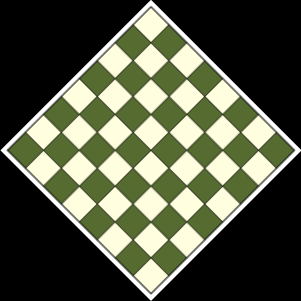
# Rotated with numpy 
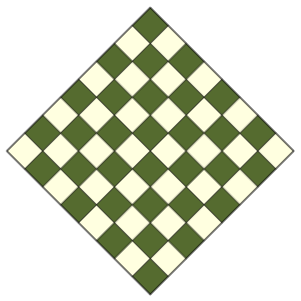

2. Use the images with titles: _"flower.jfif"_ and _"native-bee.png"_. I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are `cv.bitwise_and()`, `cv.bitwise_or()` and `cv.bitwise_not()`. You need to use `cv.threshold` function to segment the flower. Please refer to [online documentation](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html) for more info. The result should resemble the following:  
![bee and flowers](img_embed/activity3.PNG "bee_flower")

In [144]:
flower_image = cv2.imread("images/flower.jfif")
bee_image = cv2.imread("images/native-bee.png")
h,w = bee_image.shape[:2]
tx = 10
ty = 10

M = np.float32([[1,0,tx],[0,1,ty]])
flower_resized = cv.warpAffine(flower_image, M , (w,h))

result = cv2.bitwise_or(bee_image, flower_resized)
cv2.imshow('result',result)
cv2.imwrite("images/result.png",result)
cv2.waitKey(0)
cv2.destroyAllWindows()

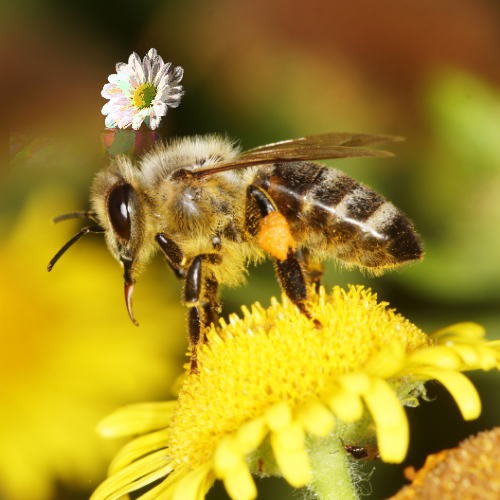

In [64]:
def random_center_crop(image, min_crop_ratio, max_crop_ratio):
      # Get image dimensions
    height, width = image.shape[:2]

    # Calculate crop sizes based on ratios
    min_crop_size = int(min(height, width) * min_crop_ratio)
    max_crop_size = int(min(height, width) * max_crop_ratio)

    # Randomly select crop size
    crop_size = np.random.randint(min_crop_size, max_crop_size + 1)

    # Calculate crop region
    x = (width - crop_size) // 2
    y = (height - crop_size) // 2

    # Perform cropping
    cropped_image = image[y:y+crop_size, x:x+crop_size]

    return cropped_image


4. Aside from Gaussian noise, name another common type of noise. Write the code to demonstrate how the noise can be included in an image.




   Poisson noise


In [53]:
image = cv2.imread('images/native-bee.png', cv2.IMREAD_COLOR)

# Generate Poisson noise
noisy_image = np.random.poisson(image / 255.0 * 100) / 100.0 * 255.0

# Ensure values are within valid range
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Display original and noisy image
cv2.imshow('Original Image', image)
cv2.imshow('Noisy Image (Poisson)', noisy_image)
cv2.imwrite('images/noisy_bee.png',noisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Comparison 
# Original
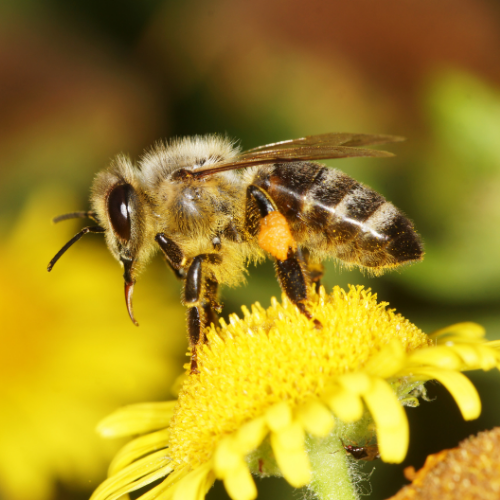
# Poisson Noise
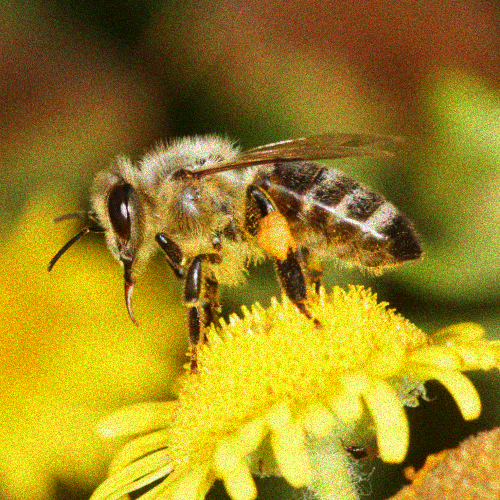